In [1]:
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import BertTokenizerFast
from torch.utils.data import DataLoader, Subset
from utils.data import COCOAEDataset, collate_fn
from utils.transforms import get_transform
from utils.transforms import ResizeTransform
from noise.scheduler import NoiseScheduler, LinearMaskScheduler, mask_image
from models.masked_autoencoder import MaskedAEConfig, MaskedAutoEncoderForPretraining, CaptionGenerator, MaskedAutoEncoderForCaptioning
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

/Users/brandonzhou/opt/anaconda3/envs/dl_proj/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
original_dataset = COCOAEDataset(root="coco/images/train2017/",
                        annFile="coco/annotations/ann2017/captions_train2017.json",
                        transform=get_transform(),
                        tokenizer=BertTokenizerFast.from_pretrained('bert-base-uncased', cache_dir='cache/'),
                        ignore_cache=False,
                        train=True)


Loading cached annotations...


In [37]:
dataset = Subset(original_dataset, range(2))
# dataset = original_dataset
# plt.imshow(dataset[0][0].permute(1, 2, 0))



In [40]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

dataloader = DataLoader(dataset,
                        batch_size=2,
                        shuffle=True,
                        collate_fn=collate_fn(dataset.dataset.tokenizer.pad_token_id),
                        pin_memory=True)


noise_scheduler = LinearMaskScheduler(vocab_size=len(dataset.dataset.tokenizer), masking_ratio=0.0)
# model = MaskedAutoEncoderForPretraining(MaskedAEConfig(len(dataset.tokenizer))).to(DEVICE)
# model = CaptionGenerator(MaskedAEConfig(len(dataset.tokenizer))).to(DEVICE)


In [53]:
model = MaskedAutoEncoderForCaptioning(MaskedAEConfig(len(dataset.dataset.tokenizer))).to(DEVICE)

In [54]:
optim = torch.optim.Adam(model.parameters(), lr=4e-5)
image_loss = torch.nn.MSELoss()
caption_loss = torch.nn.CrossEntropyLoss()

In [22]:
distributed_state_dict = torch.load("checkpoints/base_0",map_location=torch.device('cpu'))
keys = list(distributed_state_dict.keys())

In [23]:
model.load_state_dict(distributed_state_dict)

RuntimeError: Error(s) in loading state_dict for MaskedAutoEncoderForCaptioning:
	Missing key(s) in state_dict: "img_emb", "dummy_input", "start_token", "text_emb", "transformer.mask_token", "transformer.ite.weight", "transformer.ite.bias", "transformer.ipe.weight", "transformer.wte.weight", "transformer.encoder.h.layers.0.self_attn.in_proj_weight", "transformer.encoder.h.layers.0.self_attn.in_proj_bias", "transformer.encoder.h.layers.0.self_attn.out_proj.weight", "transformer.encoder.h.layers.0.self_attn.out_proj.bias", "transformer.encoder.h.layers.0.linear1.weight", "transformer.encoder.h.layers.0.linear1.bias", "transformer.encoder.h.layers.0.linear2.weight", "transformer.encoder.h.layers.0.linear2.bias", "transformer.encoder.h.layers.0.norm1.weight", "transformer.encoder.h.layers.0.norm1.bias", "transformer.encoder.h.layers.0.norm2.weight", "transformer.encoder.h.layers.0.norm2.bias", "transformer.encoder.h.layers.1.self_attn.in_proj_weight", "transformer.encoder.h.layers.1.self_attn.in_proj_bias", "transformer.encoder.h.layers.1.self_attn.out_proj.weight", "transformer.encoder.h.layers.1.self_attn.out_proj.bias", "transformer.encoder.h.layers.1.linear1.weight", "transformer.encoder.h.layers.1.linear1.bias", "transformer.encoder.h.layers.1.linear2.weight", "transformer.encoder.h.layers.1.linear2.bias", "transformer.encoder.h.layers.1.norm1.weight", "transformer.encoder.h.layers.1.norm1.bias", "transformer.encoder.h.layers.1.norm2.weight", "transformer.encoder.h.layers.1.norm2.bias", "transformer.encoder.h.layers.2.self_attn.in_proj_weight", "transformer.encoder.h.layers.2.self_attn.in_proj_bias", "transformer.encoder.h.layers.2.self_attn.out_proj.weight", "transformer.encoder.h.layers.2.self_attn.out_proj.bias", "transformer.encoder.h.layers.2.linear1.weight", "transformer.encoder.h.layers.2.linear1.bias", "transformer.encoder.h.layers.2.linear2.weight", "transformer.encoder.h.layers.2.linear2.bias", "transformer.encoder.h.layers.2.norm1.weight", "transformer.encoder.h.layers.2.norm1.bias", "transformer.encoder.h.layers.2.norm2.weight", "transformer.encoder.h.layers.2.norm2.bias", "transformer.encoder.h.layers.3.self_attn.in_proj_weight", "transformer.encoder.h.layers.3.self_attn.in_proj_bias", "transformer.encoder.h.layers.3.self_attn.out_proj.weight", "transformer.encoder.h.layers.3.self_attn.out_proj.bias", "transformer.encoder.h.layers.3.linear1.weight", "transformer.encoder.h.layers.3.linear1.bias", "transformer.encoder.h.layers.3.linear2.weight", "transformer.encoder.h.layers.3.linear2.bias", "transformer.encoder.h.layers.3.norm1.weight", "transformer.encoder.h.layers.3.norm1.bias", "transformer.encoder.h.layers.3.norm2.weight", "transformer.encoder.h.layers.3.norm2.bias", "transformer.encoder.h.layers.4.self_attn.in_proj_weight", "transformer.encoder.h.layers.4.self_attn.in_proj_bias", "transformer.encoder.h.layers.4.self_attn.out_proj.weight", "transformer.encoder.h.layers.4.self_attn.out_proj.bias", "transformer.encoder.h.layers.4.linear1.weight", "transformer.encoder.h.layers.4.linear1.bias", "transformer.encoder.h.layers.4.linear2.weight", "transformer.encoder.h.layers.4.linear2.bias", "transformer.encoder.h.layers.4.norm1.weight", "transformer.encoder.h.layers.4.norm1.bias", "transformer.encoder.h.layers.4.norm2.weight", "transformer.encoder.h.layers.4.norm2.bias", "transformer.encoder.h.layers.5.self_attn.in_proj_weight", "transformer.encoder.h.layers.5.self_attn.in_proj_bias", "transformer.encoder.h.layers.5.self_attn.out_proj.weight", "transformer.encoder.h.layers.5.self_attn.out_proj.bias", "transformer.encoder.h.layers.5.linear1.weight", "transformer.encoder.h.layers.5.linear1.bias", "transformer.encoder.h.layers.5.linear2.weight", "transformer.encoder.h.layers.5.linear2.bias", "transformer.encoder.h.layers.5.norm1.weight", "transformer.encoder.h.layers.5.norm1.bias", "transformer.encoder.h.layers.5.norm2.weight", "transformer.encoder.h.layers.5.norm2.bias", "transformer.encoder.h.layers.6.self_attn.in_proj_weight", "transformer.encoder.h.layers.6.self_attn.in_proj_bias", "transformer.encoder.h.layers.6.self_attn.out_proj.weight", "transformer.encoder.h.layers.6.self_attn.out_proj.bias", "transformer.encoder.h.layers.6.linear1.weight", "transformer.encoder.h.layers.6.linear1.bias", "transformer.encoder.h.layers.6.linear2.weight", "transformer.encoder.h.layers.6.linear2.bias", "transformer.encoder.h.layers.6.norm1.weight", "transformer.encoder.h.layers.6.norm1.bias", "transformer.encoder.h.layers.6.norm2.weight", "transformer.encoder.h.layers.6.norm2.bias", "transformer.encoder.h.layers.7.self_attn.in_proj_weight", "transformer.encoder.h.layers.7.self_attn.in_proj_bias", "transformer.encoder.h.layers.7.self_attn.out_proj.weight", "transformer.encoder.h.layers.7.self_attn.out_proj.bias", "transformer.encoder.h.layers.7.linear1.weight", "transformer.encoder.h.layers.7.linear1.bias", "transformer.encoder.h.layers.7.linear2.weight", "transformer.encoder.h.layers.7.linear2.bias", "transformer.encoder.h.layers.7.norm1.weight", "transformer.encoder.h.layers.7.norm1.bias", "transformer.encoder.h.layers.7.norm2.weight", "transformer.encoder.h.layers.7.norm2.bias", "transformer.encoder.h.layers.8.self_attn.in_proj_weight", "transformer.encoder.h.layers.8.self_attn.in_proj_bias", "transformer.encoder.h.layers.8.self_attn.out_proj.weight", "transformer.encoder.h.layers.8.self_attn.out_proj.bias", "transformer.encoder.h.layers.8.linear1.weight", "transformer.encoder.h.layers.8.linear1.bias", "transformer.encoder.h.layers.8.linear2.weight", "transformer.encoder.h.layers.8.linear2.bias", "transformer.encoder.h.layers.8.norm1.weight", "transformer.encoder.h.layers.8.norm1.bias", "transformer.encoder.h.layers.8.norm2.weight", "transformer.encoder.h.layers.8.norm2.bias", "transformer.encoder.h.layers.9.self_attn.in_proj_weight", "transformer.encoder.h.layers.9.self_attn.in_proj_bias", "transformer.encoder.h.layers.9.self_attn.out_proj.weight", "transformer.encoder.h.layers.9.self_attn.out_proj.bias", "transformer.encoder.h.layers.9.linear1.weight", "transformer.encoder.h.layers.9.linear1.bias", "transformer.encoder.h.layers.9.linear2.weight", "transformer.encoder.h.layers.9.linear2.bias", "transformer.encoder.h.layers.9.norm1.weight", "transformer.encoder.h.layers.9.norm1.bias", "transformer.encoder.h.layers.9.norm2.weight", "transformer.encoder.h.layers.9.norm2.bias", "transformer.encoder.h.layers.10.self_attn.in_proj_weight", "transformer.encoder.h.layers.10.self_attn.in_proj_bias", "transformer.encoder.h.layers.10.self_attn.out_proj.weight", "transformer.encoder.h.layers.10.self_attn.out_proj.bias", "transformer.encoder.h.layers.10.linear1.weight", "transformer.encoder.h.layers.10.linear1.bias", "transformer.encoder.h.layers.10.linear2.weight", "transformer.encoder.h.layers.10.linear2.bias", "transformer.encoder.h.layers.10.norm1.weight", "transformer.encoder.h.layers.10.norm1.bias", "transformer.encoder.h.layers.10.norm2.weight", "transformer.encoder.h.layers.10.norm2.bias", "transformer.encoder.h.layers.11.self_attn.in_proj_weight", "transformer.encoder.h.layers.11.self_attn.in_proj_bias", "transformer.encoder.h.layers.11.self_attn.out_proj.weight", "transformer.encoder.h.layers.11.self_attn.out_proj.bias", "transformer.encoder.h.layers.11.linear1.weight", "transformer.encoder.h.layers.11.linear1.bias", "transformer.encoder.h.layers.11.linear2.weight", "transformer.encoder.h.layers.11.linear2.bias", "transformer.encoder.h.layers.11.norm1.weight", "transformer.encoder.h.layers.11.norm1.bias", "transformer.encoder.h.layers.11.norm2.weight", "transformer.encoder.h.layers.11.norm2.bias", "transformer.encoder.h.layers.12.self_attn.in_proj_weight", "transformer.encoder.h.layers.12.self_attn.in_proj_bias", "transformer.encoder.h.layers.12.self_attn.out_proj.weight", "transformer.encoder.h.layers.12.self_attn.out_proj.bias", "transformer.encoder.h.layers.12.linear1.weight", "transformer.encoder.h.layers.12.linear1.bias", "transformer.encoder.h.layers.12.linear2.weight", "transformer.encoder.h.layers.12.linear2.bias", "transformer.encoder.h.layers.12.norm1.weight", "transformer.encoder.h.layers.12.norm1.bias", "transformer.encoder.h.layers.12.norm2.weight", "transformer.encoder.h.layers.12.norm2.bias", "transformer.encoder.h.layers.13.self_attn.in_proj_weight", "transformer.encoder.h.layers.13.self_attn.in_proj_bias", "transformer.encoder.h.layers.13.self_attn.out_proj.weight", "transformer.encoder.h.layers.13.self_attn.out_proj.bias", "transformer.encoder.h.layers.13.linear1.weight", "transformer.encoder.h.layers.13.linear1.bias", "transformer.encoder.h.layers.13.linear2.weight", "transformer.encoder.h.layers.13.linear2.bias", "transformer.encoder.h.layers.13.norm1.weight", "transformer.encoder.h.layers.13.norm1.bias", "transformer.encoder.h.layers.13.norm2.weight", "transformer.encoder.h.layers.13.norm2.bias", "transformer.encoder.h.layers.14.self_attn.in_proj_weight", "transformer.encoder.h.layers.14.self_attn.in_proj_bias", "transformer.encoder.h.layers.14.self_attn.out_proj.weight", "transformer.encoder.h.layers.14.self_attn.out_proj.bias", "transformer.encoder.h.layers.14.linear1.weight", "transformer.encoder.h.layers.14.linear1.bias", "transformer.encoder.h.layers.14.linear2.weight", "transformer.encoder.h.layers.14.linear2.bias", "transformer.encoder.h.layers.14.norm1.weight", "transformer.encoder.h.layers.14.norm1.bias", "transformer.encoder.h.layers.14.norm2.weight", "transformer.encoder.h.layers.14.norm2.bias", "transformer.encoder.h.layers.15.self_attn.in_proj_weight", "transformer.encoder.h.layers.15.self_attn.in_proj_bias", "transformer.encoder.h.layers.15.self_attn.out_proj.weight", "transformer.encoder.h.layers.15.self_attn.out_proj.bias", "transformer.encoder.h.layers.15.linear1.weight", "transformer.encoder.h.layers.15.linear1.bias", "transformer.encoder.h.layers.15.linear2.weight", "transformer.encoder.h.layers.15.linear2.bias", "transformer.encoder.h.layers.15.norm1.weight", "transformer.encoder.h.layers.15.norm1.bias", "transformer.encoder.h.layers.15.norm2.weight", "transformer.encoder.h.layers.15.norm2.bias", "transformer.encoder.h.norm.weight", "transformer.encoder.h.norm.bias", "decoder.layers.0.self_attn.in_proj_weight", "decoder.layers.0.self_attn.in_proj_bias", "decoder.layers.0.self_attn.out_proj.weight", "decoder.layers.0.self_attn.out_proj.bias", "decoder.layers.0.multihead_attn.in_proj_weight", "decoder.layers.0.multihead_attn.in_proj_bias", "decoder.layers.0.multihead_attn.out_proj.weight", "decoder.layers.0.multihead_attn.out_proj.bias", "decoder.layers.0.linear1.weight", "decoder.layers.0.linear1.bias", "decoder.layers.0.linear2.weight", "decoder.layers.0.linear2.bias", "decoder.layers.0.norm1.weight", "decoder.layers.0.norm1.bias", "decoder.layers.0.norm2.weight", "decoder.layers.0.norm2.bias", "decoder.layers.0.norm3.weight", "decoder.layers.0.norm3.bias", "decoder.layers.1.self_attn.in_proj_weight", "decoder.layers.1.self_attn.in_proj_bias", "decoder.layers.1.self_attn.out_proj.weight", "decoder.layers.1.self_attn.out_proj.bias", "decoder.layers.1.multihead_attn.in_proj_weight", "decoder.layers.1.multihead_attn.in_proj_bias", "decoder.layers.1.multihead_attn.out_proj.weight", "decoder.layers.1.multihead_attn.out_proj.bias", "decoder.layers.1.linear1.weight", "decoder.layers.1.linear1.bias", "decoder.layers.1.linear2.weight", "decoder.layers.1.linear2.bias", "decoder.layers.1.norm1.weight", "decoder.layers.1.norm1.bias", "decoder.layers.1.norm2.weight", "decoder.layers.1.norm2.bias", "decoder.layers.1.norm3.weight", "decoder.layers.1.norm3.bias", "decoder.layers.2.self_attn.in_proj_weight", "decoder.layers.2.self_attn.in_proj_bias", "decoder.layers.2.self_attn.out_proj.weight", "decoder.layers.2.self_attn.out_proj.bias", "decoder.layers.2.multihead_attn.in_proj_weight", "decoder.layers.2.multihead_attn.in_proj_bias", "decoder.layers.2.multihead_attn.out_proj.weight", "decoder.layers.2.multihead_attn.out_proj.bias", "decoder.layers.2.linear1.weight", "decoder.layers.2.linear1.bias", "decoder.layers.2.linear2.weight", "decoder.layers.2.linear2.bias", "decoder.layers.2.norm1.weight", "decoder.layers.2.norm1.bias", "decoder.layers.2.norm2.weight", "decoder.layers.2.norm2.bias", "decoder.layers.2.norm3.weight", "decoder.layers.2.norm3.bias", "decoder.layers.3.self_attn.in_proj_weight", "decoder.layers.3.self_attn.in_proj_bias", "decoder.layers.3.self_attn.out_proj.weight", "decoder.layers.3.self_attn.out_proj.bias", "decoder.layers.3.multihead_attn.in_proj_weight", "decoder.layers.3.multihead_attn.in_proj_bias", "decoder.layers.3.multihead_attn.out_proj.weight", "decoder.layers.3.multihead_attn.out_proj.bias", "decoder.layers.3.linear1.weight", "decoder.layers.3.linear1.bias", "decoder.layers.3.linear2.weight", "decoder.layers.3.linear2.bias", "decoder.layers.3.norm1.weight", "decoder.layers.3.norm1.bias", "decoder.layers.3.norm2.weight", "decoder.layers.3.norm2.bias", "decoder.layers.3.norm3.weight", "decoder.layers.3.norm3.bias", "decoder.layers.4.self_attn.in_proj_weight", "decoder.layers.4.self_attn.in_proj_bias", "decoder.layers.4.self_attn.out_proj.weight", "decoder.layers.4.self_attn.out_proj.bias", "decoder.layers.4.multihead_attn.in_proj_weight", "decoder.layers.4.multihead_attn.in_proj_bias", "decoder.layers.4.multihead_attn.out_proj.weight", "decoder.layers.4.multihead_attn.out_proj.bias", "decoder.layers.4.linear1.weight", "decoder.layers.4.linear1.bias", "decoder.layers.4.linear2.weight", "decoder.layers.4.linear2.bias", "decoder.layers.4.norm1.weight", "decoder.layers.4.norm1.bias", "decoder.layers.4.norm2.weight", "decoder.layers.4.norm2.bias", "decoder.layers.4.norm3.weight", "decoder.layers.4.norm3.bias", "decoder.layers.5.self_attn.in_proj_weight", "decoder.layers.5.self_attn.in_proj_bias", "decoder.layers.5.self_attn.out_proj.weight", "decoder.layers.5.self_attn.out_proj.bias", "decoder.layers.5.multihead_attn.in_proj_weight", "decoder.layers.5.multihead_attn.in_proj_bias", "decoder.layers.5.multihead_attn.out_proj.weight", "decoder.layers.5.multihead_attn.out_proj.bias", "decoder.layers.5.linear1.weight", "decoder.layers.5.linear1.bias", "decoder.layers.5.linear2.weight", "decoder.layers.5.linear2.bias", "decoder.layers.5.norm1.weight", "decoder.layers.5.norm1.bias", "decoder.layers.5.norm2.weight", "decoder.layers.5.norm2.bias", "decoder.layers.5.norm3.weight", "decoder.layers.5.norm3.bias", "decoder.layers.6.self_attn.in_proj_weight", "decoder.layers.6.self_attn.in_proj_bias", "decoder.layers.6.self_attn.out_proj.weight", "decoder.layers.6.self_attn.out_proj.bias", "decoder.layers.6.multihead_attn.in_proj_weight", "decoder.layers.6.multihead_attn.in_proj_bias", "decoder.layers.6.multihead_attn.out_proj.weight", "decoder.layers.6.multihead_attn.out_proj.bias", "decoder.layers.6.linear1.weight", "decoder.layers.6.linear1.bias", "decoder.layers.6.linear2.weight", "decoder.layers.6.linear2.bias", "decoder.layers.6.norm1.weight", "decoder.layers.6.norm1.bias", "decoder.layers.6.norm2.weight", "decoder.layers.6.norm2.bias", "decoder.layers.6.norm3.weight", "decoder.layers.6.norm3.bias", "decoder.layers.7.self_attn.in_proj_weight", "decoder.layers.7.self_attn.in_proj_bias", "decoder.layers.7.self_attn.out_proj.weight", "decoder.layers.7.self_attn.out_proj.bias", "decoder.layers.7.multihead_attn.in_proj_weight", "decoder.layers.7.multihead_attn.in_proj_bias", "decoder.layers.7.multihead_attn.out_proj.weight", "decoder.layers.7.multihead_attn.out_proj.bias", "decoder.layers.7.linear1.weight", "decoder.layers.7.linear1.bias", "decoder.layers.7.linear2.weight", "decoder.layers.7.linear2.bias", "decoder.layers.7.norm1.weight", "decoder.layers.7.norm1.bias", "decoder.layers.7.norm2.weight", "decoder.layers.7.norm2.bias", "decoder.layers.7.norm3.weight", "decoder.layers.7.norm3.bias", "decoder.layers.8.self_attn.in_proj_weight", "decoder.layers.8.self_attn.in_proj_bias", "decoder.layers.8.self_attn.out_proj.weight", "decoder.layers.8.self_attn.out_proj.bias", "decoder.layers.8.multihead_attn.in_proj_weight", "decoder.layers.8.multihead_attn.in_proj_bias", "decoder.layers.8.multihead_attn.out_proj.weight", "decoder.layers.8.multihead_attn.out_proj.bias", "decoder.layers.8.linear1.weight", "decoder.layers.8.linear1.bias", "decoder.layers.8.linear2.weight", "decoder.layers.8.linear2.bias", "decoder.layers.8.norm1.weight", "decoder.layers.8.norm1.bias", "decoder.layers.8.norm2.weight", "decoder.layers.8.norm2.bias", "decoder.layers.8.norm3.weight", "decoder.layers.8.norm3.bias", "decoder.layers.9.self_attn.in_proj_weight", "decoder.layers.9.self_attn.in_proj_bias", "decoder.layers.9.self_attn.out_proj.weight", "decoder.layers.9.self_attn.out_proj.bias", "decoder.layers.9.multihead_attn.in_proj_weight", "decoder.layers.9.multihead_attn.in_proj_bias", "decoder.layers.9.multihead_attn.out_proj.weight", "decoder.layers.9.multihead_attn.out_proj.bias", "decoder.layers.9.linear1.weight", "decoder.layers.9.linear1.bias", "decoder.layers.9.linear2.weight", "decoder.layers.9.linear2.bias", "decoder.layers.9.norm1.weight", "decoder.layers.9.norm1.bias", "decoder.layers.9.norm2.weight", "decoder.layers.9.norm2.bias", "decoder.layers.9.norm3.weight", "decoder.layers.9.norm3.bias", "decoder.norm.weight", "decoder.norm.bias", "caption_head.weight", "caption_head.bias". 
	Unexpected key(s) in state_dict: "mask_token", "ite.weight", "ite.bias", "ipe.weight", "wte.weight", "encoder.h.layers.0.self_attn.in_proj_weight", "encoder.h.layers.0.self_attn.in_proj_bias", "encoder.h.layers.0.self_attn.out_proj.weight", "encoder.h.layers.0.self_attn.out_proj.bias", "encoder.h.layers.0.linear1.weight", "encoder.h.layers.0.linear1.bias", "encoder.h.layers.0.linear2.weight", "encoder.h.layers.0.linear2.bias", "encoder.h.layers.0.norm1.weight", "encoder.h.layers.0.norm1.bias", "encoder.h.layers.0.norm2.weight", "encoder.h.layers.0.norm2.bias", "encoder.h.layers.1.self_attn.in_proj_weight", "encoder.h.layers.1.self_attn.in_proj_bias", "encoder.h.layers.1.self_attn.out_proj.weight", "encoder.h.layers.1.self_attn.out_proj.bias", "encoder.h.layers.1.linear1.weight", "encoder.h.layers.1.linear1.bias", "encoder.h.layers.1.linear2.weight", "encoder.h.layers.1.linear2.bias", "encoder.h.layers.1.norm1.weight", "encoder.h.layers.1.norm1.bias", "encoder.h.layers.1.norm2.weight", "encoder.h.layers.1.norm2.bias", "encoder.h.layers.2.self_attn.in_proj_weight", "encoder.h.layers.2.self_attn.in_proj_bias", "encoder.h.layers.2.self_attn.out_proj.weight", "encoder.h.layers.2.self_attn.out_proj.bias", "encoder.h.layers.2.linear1.weight", "encoder.h.layers.2.linear1.bias", "encoder.h.layers.2.linear2.weight", "encoder.h.layers.2.linear2.bias", "encoder.h.layers.2.norm1.weight", "encoder.h.layers.2.norm1.bias", "encoder.h.layers.2.norm2.weight", "encoder.h.layers.2.norm2.bias", "encoder.h.layers.3.self_attn.in_proj_weight", "encoder.h.layers.3.self_attn.in_proj_bias", "encoder.h.layers.3.self_attn.out_proj.weight", "encoder.h.layers.3.self_attn.out_proj.bias", "encoder.h.layers.3.linear1.weight", "encoder.h.layers.3.linear1.bias", "encoder.h.layers.3.linear2.weight", "encoder.h.layers.3.linear2.bias", "encoder.h.layers.3.norm1.weight", "encoder.h.layers.3.norm1.bias", "encoder.h.layers.3.norm2.weight", "encoder.h.layers.3.norm2.bias", "encoder.h.layers.4.self_attn.in_proj_weight", "encoder.h.layers.4.self_attn.in_proj_bias", "encoder.h.layers.4.self_attn.out_proj.weight", "encoder.h.layers.4.self_attn.out_proj.bias", "encoder.h.layers.4.linear1.weight", "encoder.h.layers.4.linear1.bias", "encoder.h.layers.4.linear2.weight", "encoder.h.layers.4.linear2.bias", "encoder.h.layers.4.norm1.weight", "encoder.h.layers.4.norm1.bias", "encoder.h.layers.4.norm2.weight", "encoder.h.layers.4.norm2.bias", "encoder.h.layers.5.self_attn.in_proj_weight", "encoder.h.layers.5.self_attn.in_proj_bias", "encoder.h.layers.5.self_attn.out_proj.weight", "encoder.h.layers.5.self_attn.out_proj.bias", "encoder.h.layers.5.linear1.weight", "encoder.h.layers.5.linear1.bias", "encoder.h.layers.5.linear2.weight", "encoder.h.layers.5.linear2.bias", "encoder.h.layers.5.norm1.weight", "encoder.h.layers.5.norm1.bias", "encoder.h.layers.5.norm2.weight", "encoder.h.layers.5.norm2.bias", "encoder.h.layers.6.self_attn.in_proj_weight", "encoder.h.layers.6.self_attn.in_proj_bias", "encoder.h.layers.6.self_attn.out_proj.weight", "encoder.h.layers.6.self_attn.out_proj.bias", "encoder.h.layers.6.linear1.weight", "encoder.h.layers.6.linear1.bias", "encoder.h.layers.6.linear2.weight", "encoder.h.layers.6.linear2.bias", "encoder.h.layers.6.norm1.weight", "encoder.h.layers.6.norm1.bias", "encoder.h.layers.6.norm2.weight", "encoder.h.layers.6.norm2.bias", "encoder.h.layers.7.self_attn.in_proj_weight", "encoder.h.layers.7.self_attn.in_proj_bias", "encoder.h.layers.7.self_attn.out_proj.weight", "encoder.h.layers.7.self_attn.out_proj.bias", "encoder.h.layers.7.linear1.weight", "encoder.h.layers.7.linear1.bias", "encoder.h.layers.7.linear2.weight", "encoder.h.layers.7.linear2.bias", "encoder.h.layers.7.norm1.weight", "encoder.h.layers.7.norm1.bias", "encoder.h.layers.7.norm2.weight", "encoder.h.layers.7.norm2.bias", "encoder.h.layers.8.self_attn.in_proj_weight", "encoder.h.layers.8.self_attn.in_proj_bias", "encoder.h.layers.8.self_attn.out_proj.weight", "encoder.h.layers.8.self_attn.out_proj.bias", "encoder.h.layers.8.linear1.weight", "encoder.h.layers.8.linear1.bias", "encoder.h.layers.8.linear2.weight", "encoder.h.layers.8.linear2.bias", "encoder.h.layers.8.norm1.weight", "encoder.h.layers.8.norm1.bias", "encoder.h.layers.8.norm2.weight", "encoder.h.layers.8.norm2.bias", "encoder.h.layers.9.self_attn.in_proj_weight", "encoder.h.layers.9.self_attn.in_proj_bias", "encoder.h.layers.9.self_attn.out_proj.weight", "encoder.h.layers.9.self_attn.out_proj.bias", "encoder.h.layers.9.linear1.weight", "encoder.h.layers.9.linear1.bias", "encoder.h.layers.9.linear2.weight", "encoder.h.layers.9.linear2.bias", "encoder.h.layers.9.norm1.weight", "encoder.h.layers.9.norm1.bias", "encoder.h.layers.9.norm2.weight", "encoder.h.layers.9.norm2.bias", "encoder.h.layers.10.self_attn.in_proj_weight", "encoder.h.layers.10.self_attn.in_proj_bias", "encoder.h.layers.10.self_attn.out_proj.weight", "encoder.h.layers.10.self_attn.out_proj.bias", "encoder.h.layers.10.linear1.weight", "encoder.h.layers.10.linear1.bias", "encoder.h.layers.10.linear2.weight", "encoder.h.layers.10.linear2.bias", "encoder.h.layers.10.norm1.weight", "encoder.h.layers.10.norm1.bias", "encoder.h.layers.10.norm2.weight", "encoder.h.layers.10.norm2.bias", "encoder.h.layers.11.self_attn.in_proj_weight", "encoder.h.layers.11.self_attn.in_proj_bias", "encoder.h.layers.11.self_attn.out_proj.weight", "encoder.h.layers.11.self_attn.out_proj.bias", "encoder.h.layers.11.linear1.weight", "encoder.h.layers.11.linear1.bias", "encoder.h.layers.11.linear2.weight", "encoder.h.layers.11.linear2.bias", "encoder.h.layers.11.norm1.weight", "encoder.h.layers.11.norm1.bias", "encoder.h.layers.11.norm2.weight", "encoder.h.layers.11.norm2.bias", "encoder.h.layers.12.self_attn.in_proj_weight", "encoder.h.layers.12.self_attn.in_proj_bias", "encoder.h.layers.12.self_attn.out_proj.weight", "encoder.h.layers.12.self_attn.out_proj.bias", "encoder.h.layers.12.linear1.weight", "encoder.h.layers.12.linear1.bias", "encoder.h.layers.12.linear2.weight", "encoder.h.layers.12.linear2.bias", "encoder.h.layers.12.norm1.weight", "encoder.h.layers.12.norm1.bias", "encoder.h.layers.12.norm2.weight", "encoder.h.layers.12.norm2.bias", "encoder.h.layers.13.self_attn.in_proj_weight", "encoder.h.layers.13.self_attn.in_proj_bias", "encoder.h.layers.13.self_attn.out_proj.weight", "encoder.h.layers.13.self_attn.out_proj.bias", "encoder.h.layers.13.linear1.weight", "encoder.h.layers.13.linear1.bias", "encoder.h.layers.13.linear2.weight", "encoder.h.layers.13.linear2.bias", "encoder.h.layers.13.norm1.weight", "encoder.h.layers.13.norm1.bias", "encoder.h.layers.13.norm2.weight", "encoder.h.layers.13.norm2.bias", "encoder.h.layers.14.self_attn.in_proj_weight", "encoder.h.layers.14.self_attn.in_proj_bias", "encoder.h.layers.14.self_attn.out_proj.weight", "encoder.h.layers.14.self_attn.out_proj.bias", "encoder.h.layers.14.linear1.weight", "encoder.h.layers.14.linear1.bias", "encoder.h.layers.14.linear2.weight", "encoder.h.layers.14.linear2.bias", "encoder.h.layers.14.norm1.weight", "encoder.h.layers.14.norm1.bias", "encoder.h.layers.14.norm2.weight", "encoder.h.layers.14.norm2.bias", "encoder.h.layers.15.self_attn.in_proj_weight", "encoder.h.layers.15.self_attn.in_proj_bias", "encoder.h.layers.15.self_attn.out_proj.weight", "encoder.h.layers.15.self_attn.out_proj.bias", "encoder.h.layers.15.linear1.weight", "encoder.h.layers.15.linear1.bias", "encoder.h.layers.15.linear2.weight", "encoder.h.layers.15.linear2.bias", "encoder.h.layers.15.norm1.weight", "encoder.h.layers.15.norm1.bias", "encoder.h.layers.15.norm2.weight", "encoder.h.layers.15.norm2.bias", "encoder.h.norm.weight", "encoder.h.norm.bias". 

In [78]:
testimg, testcap = original_dataset[10]
for c in testcap:
    print(dataset.dataset.tokenizer.decode(c))

cluttered room table shelf wall
[unused5]


In [77]:
for epoch in (pbar := tqdm(range(100))):
    for images, captions, lengths in dataloader:
        optim.zero_grad()
        images = images.to(DEVICE, non_blocking=True)
        captions = captions.to(DEVICE, non_blocking=True)

        masked_images, masked_text, _, (ip, rp) = noise_scheduler.get_masked(images, captions, lengths, need_masks=True)
        # print(masked_images.shape, masked_text.shape)
        max_length = torch.max(lengths)
        pad_mask = torch.arange(0, max_length, device=captions.device)[None, :] < lengths        
        reconstructed_captions = model.forward(masked_images)
        for c in captions:
            print("Original:", dataset.dataset.tokenizer.decode(c))
        for c in reconstructed_captions:
            print("Generated:", dataset.dataset.tokenizer.decode(torch.argmax(c, dim=-1)))            
        # print(captions, reconstructed_captions)
        if epoch == 99:
            print(captions, reconstructed_captions)
        
        padded_caption = torch.nn.functional.pad(captions, (0, 10-captions.shape[1]))

        cap_loss = caption_loss(reconstructed_captions.permute(0, 2, 1), padded_caption)
        pbar.set_description(f"Epoch: {epoch}, Caption Loss : {cap_loss.item():1.3}")
        (cap_loss).backward()
        # print(model.ite.weight.grad)
        optim.step()
        
    


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 0, Caption Loss : 7.5:   0%|          | 0/100 [00:01<?, ?it/s]

Original: woman marking cake back chef knife [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 0, Caption Loss : 7.5:   1%|          | 1/100 [00:07<11:43,  7.11s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 1, Caption Loss : 6.73:   1%|          | 1/100 [00:08<11:43,  7.11s/it]

Original: man riding motor bike dirt road countryside
Original: woman wearing net head cutting cake [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 1, Caption Loss : 6.73:   2%|▏         | 2/100 [00:12<09:49,  6.01s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 2, Caption Loss : 8.81:   2%|▏         | 2/100 [00:13<09:49,  6.01s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman wearing hair net cutting large sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 2, Caption Loss : 8.81:   3%|▎         | 3/100 [00:17<08:57,  5.54s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 3, Caption Loss : 7.62:   3%|▎         | 3/100 [00:18<08:57,  5.54s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman marking cake back chef knife [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 3, Caption Loss : 7.62:   4%|▍         | 4/100 [00:22<08:29,  5.31s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 4, Caption Loss : 5.57:   4%|▍         | 4/100 [00:23<08:29,  5.31s/it]

Original: man riding back motorcycle [PAD] [PAD]
Original: is woman is cutting white cake
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 4, Caption Loss : 5.57:   5%|▌         | 5/100 [00:27<08:08,  5.15s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 5, Caption Loss : 6.77:   5%|▌         | 5/100 [00:28<08:08,  5.15s/it]

Original: man red helmet small moped dirt road
Original: is woman is cutting white cake [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 5, Caption Loss : 6.77:   6%|▌         | 6/100 [00:32<08:01,  5.12s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 6, Caption Loss : 4.96:   6%|▌         | 6/100 [00:33<08:01,  5.12s/it]

Original: woman wearing net head cutting cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 6, Caption Loss : 4.96:   7%|▋         | 7/100 [00:37<07:55,  5.11s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 7, Caption Loss : 7.71:   7%|▋         | 7/100 [00:38<07:55,  5.11s/it]

Original: man red shirt red hat is motorcycle hill side
Original: woman wearing hair net cutting large sheet cake [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 7, Caption Loss : 7.71:   8%|▊         | 8/100 [00:43<08:22,  5.47s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 8, Caption Loss : 6.37:   8%|▊         | 8/100 [00:44<08:22,  5.47s/it]

Original: woman cutting large white sheet cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 8, Caption Loss : 6.37:   9%|▉         | 9/100 [00:48<07:53,  5.20s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 9, Caption Loss : 4.4:   9%|▉         | 9/100 [00:49<07:53,  5.20s/it] 

Original: is woman is cutting white cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 9, Caption Loss : 4.4:  10%|█         | 10/100 [00:53<07:40,  5.12s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 10, Caption Loss : 6.84:  10%|█         | 10/100 [00:54<07:40,  5.12s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman wearing net head cutting cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 10, Caption Loss : 6.84:  11%|█         | 11/100 [00:57<07:24,  5.00s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 11, Caption Loss : 6.28:  11%|█         | 11/100 [00:59<07:24,  5.00s/it]

Original: man red shirt red hat is motorcycle hill side
Original: woman cutting large white sheet cake [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 11, Caption Loss : 6.28:  12%|█▏        | 12/100 [01:02<07:19,  4.99s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 12, Caption Loss : 5.29:  12%|█▏        | 12/100 [01:04<07:19,  4.99s/it]

Original: is woman is cutting white cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 12, Caption Loss : 5.29:  13%|█▎        | 13/100 [01:07<07:10,  4.95s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 13, Caption Loss : 6.19:  13%|█▎        | 13/100 [01:09<07:10,  4.95s/it]

Original: woman marking cake back chef knife [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 13, Caption Loss : 6.19:  14%|█▍        | 14/100 [01:12<07:07,  4.97s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 14, Caption Loss : 5.73:  14%|█▍        | 14/100 [01:13<07:07,  4.97s/it]

Original: man red helmet small moped dirt road
Original: woman wearing net head cutting cake [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 14, Caption Loss : 5.73:  15%|█▌        | 15/100 [01:17<06:59,  4.93s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 15, Caption Loss : 5.21:  15%|█▌        | 15/100 [01:18<06:59,  4.93s/it]

Original: woman cutting large white sheet cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 15, Caption Loss : 5.21:  16%|█▌        | 16/100 [01:22<07:00,  5.01s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 16, Caption Loss : 5.76:  16%|█▌        | 16/100 [01:24<07:00,  5.01s/it]

Original: woman cutting large white sheet cake [PAD] [PAD] [PAD]
Original: man red shirt red hat is motorcycle hill side
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 16, Caption Loss : 5.76:  17%|█▋        | 17/100 [01:30<08:17,  5.99s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 17, Caption Loss : 6.19:  17%|█▋        | 17/100 [01:32<08:17,  5.99s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: is woman is cutting white cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 17, Caption Loss : 6.19:  18%|█▊        | 18/100 [01:40<09:37,  7.04s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 18, Caption Loss : 5.78:  18%|█▊        | 18/100 [01:42<09:37,  7.04s/it]

Original: man riding motor bike dirt road countryside [PAD]
Original: woman wearing hair net cutting large sheet cake
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 18, Caption Loss : 5.78:  19%|█▉        | 19/100 [01:45<08:50,  6.54s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 19, Caption Loss : 4.63:  19%|█▉        | 19/100 [01:47<08:50,  6.54s/it]

Original: is woman is cutting white cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 19, Caption Loss : 4.63:  20%|██        | 20/100 [01:51<08:15,  6.19s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 20, Caption Loss : 6.63:  20%|██        | 20/100 [01:52<08:15,  6.19s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman marking cake back chef knife [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 20, Caption Loss : 6.63:  21%|██        | 21/100 [01:56<07:54,  6.01s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 21, Caption Loss : 6.82:  21%|██        | 21/100 [01:58<07:54,  6.01s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman wearing hair net cutting large sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 21, Caption Loss : 6.82:  22%|██▏       | 22/100 [02:02<07:30,  5.78s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 22, Caption Loss : 5.89:  22%|██▏       | 22/100 [02:03<07:30,  5.78s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman cutting large white sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 22, Caption Loss : 5.89:  23%|██▎       | 23/100 [02:07<07:08,  5.56s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 23, Caption Loss : 5.62:  23%|██▎       | 23/100 [02:08<07:08,  5.56s/it]

Original: woman marking cake back chef knife [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 23, Caption Loss : 5.62:  24%|██▍       | 24/100 [02:13<07:19,  5.78s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 24, Caption Loss : 5.75:  24%|██▍       | 24/100 [02:14<07:19,  5.78s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman wearing net head cutting cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 24, Caption Loss : 5.75:  25%|██▌       | 25/100 [02:18<06:55,  5.54s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 25, Caption Loss : 4.84:  25%|██▌       | 25/100 [02:20<06:55,  5.54s/it]

Original: man riding back motorcycle [PAD] [PAD] [PAD] [PAD]
Original: woman wearing hair net cutting large sheet cake
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 25, Caption Loss : 4.84:  26%|██▌       | 26/100 [02:23<06:43,  5.45s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 26, Caption Loss : 5.25:  26%|██▌       | 26/100 [02:25<06:43,  5.45s/it]

Original: is woman is cutting white cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 26, Caption Loss : 5.25:  27%|██▋       | 27/100 [02:28<06:23,  5.25s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 27, Caption Loss : 4.31:  27%|██▋       | 27/100 [02:29<06:23,  5.25s/it]

Original: woman cutting large white sheet cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 27, Caption Loss : 4.31:  28%|██▊       | 28/100 [02:33<06:09,  5.14s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 28, Caption Loss : 5.71:  28%|██▊       | 28/100 [02:34<06:09,  5.14s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman marking cake back chef knife [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 28, Caption Loss : 5.71:  29%|██▉       | 29/100 [02:37<05:52,  4.97s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 29, Caption Loss : 4.97:  29%|██▉       | 29/100 [02:39<05:52,  4.97s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: is woman is cutting white cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 29, Caption Loss : 4.97:  30%|███       | 30/100 [02:42<05:46,  4.95s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 30, Caption Loss : 4.91:  30%|███       | 30/100 [02:44<05:46,  4.95s/it]

Original: man red helmet small moped dirt road
Original: woman wearing net head cutting cake [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 30, Caption Loss : 4.91:  31%|███       | 31/100 [02:47<05:41,  4.95s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 31, Caption Loss : 4.52:  31%|███       | 31/100 [02:49<05:41,  4.95s/it]

Original: man riding back motorcycle [PAD] [PAD] [PAD] [PAD]
Original: woman wearing hair net cutting large sheet cake
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 31, Caption Loss : 4.52:  32%|███▏      | 32/100 [02:56<06:47,  5.99s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 32, Caption Loss : 4.49:  32%|███▏      | 32/100 [02:57<06:47,  5.99s/it]

Original: is woman is cutting white cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 32, Caption Loss : 4.49:  33%|███▎      | 33/100 [03:02<06:58,  6.25s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 33, Caption Loss : 5.1:  33%|███▎      | 33/100 [03:04<06:58,  6.25s/it] 

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman marking cake back chef knife [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 33, Caption Loss : 5.1:  34%|███▍      | 34/100 [03:08<06:37,  6.02s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 34, Caption Loss : 3.95:  34%|███▍      | 34/100 [03:10<06:37,  6.02s/it]

Original: woman wearing net head cutting cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 34, Caption Loss : 3.95:  35%|███▌      | 35/100 [03:15<06:57,  6.42s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 35, Caption Loss : 3.58:  35%|███▌      | 35/100 [03:17<06:57,  6.42s/it]

Original: woman wearing net head cutting cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 35, Caption Loss : 3.58:  36%|███▌      | 36/100 [03:20<06:21,  5.96s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 36, Caption Loss : 5.68:  36%|███▌      | 36/100 [03:22<06:21,  5.96s/it]

Original: woman wearing hair net cutting large sheet cake [PAD]
Original: man red shirt red hat is motorcycle hill side
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 36, Caption Loss : 5.68:  37%|███▋      | 37/100 [03:25<06:03,  5.76s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 37, Caption Loss : 4.36:  37%|███▋      | 37/100 [03:27<06:03,  5.76s/it]

Original: is woman is cutting white cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Genereated: woman [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 37, Caption Loss : 4.36:  38%|███▊      | 38/100 [03:30<05:41,  5.51s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 38, Caption Loss : 3.51:  38%|███▊      | 38/100 [03:32<05:41,  5.51s/it]

Original: man riding motor bike dirt road countryside
Original: woman wearing net head cutting cake [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 38, Caption Loss : 3.51:  39%|███▉      | 39/100 [03:35<05:28,  5.38s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 39, Caption Loss : 4.62:  39%|███▉      | 39/100 [03:37<05:28,  5.38s/it]

Original: man red shirt red hat is motorcycle hill side
Original: woman wearing net head cutting cake [PAD] [PAD] [PAD]
Genereated: [PAD] man man [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 39, Caption Loss : 4.62:  40%|████      | 40/100 [03:40<05:09,  5.16s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 40, Caption Loss : 4.05:  40%|████      | 40/100 [03:41<05:09,  5.16s/it]

Original: woman marking cake back chef knife [PAD]
Original: man riding motor bike dirt road countryside
Genereated: [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 40, Caption Loss : 4.05:  41%|████      | 41/100 [03:45<05:00,  5.09s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 41, Caption Loss : 5.18:  41%|████      | 41/100 [03:46<05:00,  5.09s/it]

Original: man red shirt red hat is motorcycle hill side
Original: woman wearing hair net cutting large sheet cake [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: [PAD] cake [PAD] [PAD] [PAD] cake [PAD] [PAD] [PAD] [PAD]


Epoch: 41, Caption Loss : 5.18:  42%|████▏     | 42/100 [03:50<04:46,  4.94s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 42, Caption Loss : 3.76:  42%|████▏     | 42/100 [03:51<04:46,  4.94s/it]

Original: man red helmet small moped dirt road
Original: woman wearing net head cutting cake [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake cake cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 42, Caption Loss : 3.76:  43%|████▎     | 43/100 [03:54<04:40,  4.91s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 43, Caption Loss : 3.02:  43%|████▎     | 43/100 [03:56<04:40,  4.91s/it]

Original: woman wearing net head cutting cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 43, Caption Loss : 3.02:  44%|████▍     | 44/100 [04:02<05:13,  5.59s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 44, Caption Loss : 4.43:  44%|████▍     | 44/100 [04:03<05:13,  5.59s/it]

Original: man red helmet small moped dirt road
Original: woman marking cake back chef knife [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cutting cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 44, Caption Loss : 4.43:  45%|████▌     | 45/100 [04:08<05:14,  5.72s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 45, Caption Loss : 3.48:  45%|████▌     | 45/100 [04:09<05:14,  5.72s/it]

Original: woman wearing hair net cutting large sheet cake
Original: man riding back motorcycle [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 45, Caption Loss : 3.48:  46%|████▌     | 46/100 [04:13<04:55,  5.48s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 46, Caption Loss : 2.46:  46%|████▌     | 46/100 [04:14<04:55,  5.48s/it]

Original: woman wearing net head cutting cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 46, Caption Loss : 2.46:  47%|████▋     | 47/100 [04:17<04:40,  5.30s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 47, Caption Loss : 3.51:  47%|████▋     | 47/100 [04:19<04:40,  5.30s/it]

Original: man riding motor bike dirt road countryside
Original: woman marking cake back chef knife [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake woman woman cake [PAD] [PAD] [PAD] [PAD]


Epoch: 47, Caption Loss : 3.51:  48%|████▊     | 48/100 [04:23<04:31,  5.22s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 48, Caption Loss : 3.73:  48%|████▊     | 48/100 [04:24<04:31,  5.22s/it]

Original: man red helmet small moped dirt road
Original: woman cutting large white sheet cake [PAD] [PAD]
Genereated: man man man man man [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman woman woman woman cake [PAD] [PAD] [PAD] [PAD]


Epoch: 48, Caption Loss : 3.73:  49%|████▉     | 49/100 [04:28<04:28,  5.26s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 49, Caption Loss : 3.97:  49%|████▉     | 49/100 [04:29<04:28,  5.26s/it]

Original: man red shirt red hat is motorcycle hill side
Original: is woman is cutting white cake [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman woman woman woman cake [PAD] [PAD] [PAD] [PAD]


Epoch: 49, Caption Loss : 3.97:  50%|█████     | 50/100 [04:33<04:27,  5.36s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 50, Caption Loss : 3.19:  50%|█████     | 50/100 [04:35<04:27,  5.36s/it]

Original: man riding back motorcycle [PAD] [PAD] [PAD] [PAD]
Original: woman wearing hair net cutting large sheet cake
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake cake woman cake [PAD] [PAD] [PAD] [PAD]


Epoch: 50, Caption Loss : 3.19:  51%|█████     | 51/100 [04:39<04:27,  5.46s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 51, Caption Loss : 2.85:  51%|█████     | 51/100 [04:41<04:27,  5.46s/it]

Original: woman cutting large white sheet cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman woman woman woman woman cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 51, Caption Loss : 2.85:  52%|█████▏    | 52/100 [04:44<04:15,  5.33s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 52, Caption Loss : 2.5:  52%|█████▏    | 52/100 [04:45<04:15,  5.33s/it] 

Original: man riding motor bike dirt road countryside
Original: woman wearing net head cutting cake [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman woman woman woman cake [PAD] [PAD] [PAD] [PAD]


Epoch: 52, Caption Loss : 2.5:  53%|█████▎    | 53/100 [04:49<04:00,  5.12s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 53, Caption Loss : 3.23:  53%|█████▎    | 53/100 [04:50<04:00,  5.12s/it]

Original: woman wearing hair net cutting large sheet cake
Original: man riding motor bike dirt road countryside [PAD]
Genereated: woman woman cake cake cake cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 53, Caption Loss : 3.23:  54%|█████▍    | 54/100 [04:54<03:52,  5.05s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 54, Caption Loss : 3.34:  54%|█████▍    | 54/100 [04:55<03:52,  5.05s/it]

Original: is woman is cutting white cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman woman cake woman cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 54, Caption Loss : 3.34:  55%|█████▌    | 55/100 [04:59<03:46,  5.03s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 55, Caption Loss : 2.37:  55%|█████▌    | 55/100 [05:00<03:46,  5.03s/it]

Original: man riding back motorcycle [PAD] [PAD]
Original: woman cutting large white sheet cake
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 55, Caption Loss : 2.37:  56%|█████▌    | 56/100 [05:04<03:51,  5.26s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 56, Caption Loss : 3.05:  56%|█████▌    | 56/100 [05:06<03:51,  5.26s/it]

Original: woman marking cake back chef knife [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman cutting cutting cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]


Epoch: 56, Caption Loss : 3.05:  57%|█████▋    | 57/100 [05:10<03:47,  5.28s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 57, Caption Loss : 2.07:  57%|█████▋    | 57/100 [05:11<03:47,  5.28s/it]

Original: man riding back motorcycle [PAD] [PAD]
Original: woman wearing net head cutting cake
Genereated: man man man man man man [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cutting cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 57, Caption Loss : 2.07:  58%|█████▊    | 58/100 [05:15<03:39,  5.22s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 58, Caption Loss : 2.81:  58%|█████▊    | 58/100 [05:16<03:39,  5.22s/it]

Original: man riding motor bike dirt road countryside
Original: woman marking cake back chef knife [PAD]
Genereated: man man man man man [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 58, Caption Loss : 2.81:  59%|█████▉    | 59/100 [05:20<03:35,  5.24s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 59, Caption Loss : 3.58:  59%|█████▉    | 59/100 [05:22<03:35,  5.24s/it]

Original: woman marking cake back chef knife [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 59, Caption Loss : 3.58:  60%|██████    | 60/100 [05:26<03:31,  5.29s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 60, Caption Loss : 4.38:  60%|██████    | 60/100 [05:27<03:31,  5.29s/it]

Original: is woman is cutting white cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man man man [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 60, Caption Loss : 4.38:  61%|██████    | 61/100 [05:31<03:23,  5.22s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 61, Caption Loss : 2.9:  61%|██████    | 61/100 [05:32<03:23,  5.22s/it] 

Original: is woman is cutting white cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman woman cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding dirt riding dirt [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 61, Caption Loss : 2.9:  62%|██████▏   | 62/100 [05:36<03:20,  5.28s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 62, Caption Loss : 1.96:  62%|██████▏   | 62/100 [05:38<03:20,  5.28s/it]

Original: woman cutting large white sheet cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: woman woman cake cutting cake cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding dirt man dirt [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 62, Caption Loss : 1.96:  63%|██████▎   | 63/100 [05:41<03:13,  5.23s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 63, Caption Loss : 2.04:  63%|██████▎   | 63/100 [05:43<03:13,  5.23s/it]

Original: woman cutting large white sheet cake [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman woman cake cutting cake [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: man riding dirt riding dirt [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 63, Caption Loss : 2.04:  64%|██████▍   | 64/100 [05:47<03:10,  5.29s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 64, Caption Loss : 1.7:  64%|██████▍   | 64/100 [05:48<03:10,  5.29s/it] 

Original: is woman is cutting white cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: woman woman cake cutting cake cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding dirt dirt dirt [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 64, Caption Loss : 1.7:  65%|██████▌   | 65/100 [05:52<03:05,  5.29s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 65, Caption Loss : 2.43:  65%|██████▌   | 65/100 [05:53<03:05,  5.29s/it]

Original: woman marking cake back chef knife [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman woman cake cutting cake cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding dirt dirt [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 65, Caption Loss : 2.43:  66%|██████▌   | 66/100 [06:00<03:24,  6.02s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 66, Caption Loss : 1.55:  66%|██████▌   | 66/100 [06:01<03:24,  6.02s/it]

Original: man riding back motorcycle [PAD] [PAD]
Original: is woman is cutting white cake
Genereated: man riding dirt dirt [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake white cake cake [PAD] [PAD] [PAD] [PAD]


Epoch: 66, Caption Loss : 1.55:  67%|██████▋   | 67/100 [06:05<03:14,  5.90s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 67, Caption Loss : 3.71:  67%|██████▋   | 67/100 [06:07<03:14,  5.90s/it]

Original: man red shirt red hat is motorcycle hill side
Original: woman wearing net head cutting cake [PAD] [PAD] [PAD]
Genereated: man riding riding riding [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cake cutting cake cake [PAD] [PAD] [PAD] [PAD]


Epoch: 67, Caption Loss : 3.71:  68%|██████▊   | 68/100 [06:10<02:57,  5.54s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 68, Caption Loss : 2.93:  68%|██████▊   | 68/100 [06:11<02:57,  5.54s/it]

Original: woman wearing net head cutting cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman woman is white white cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding riding riding [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 68, Caption Loss : 2.93:  69%|██████▉   | 69/100 [06:15<02:44,  5.32s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 69, Caption Loss : 2.3:  69%|██████▉   | 69/100 [06:16<02:44,  5.32s/it] 

Original: man red helmet small moped dirt road
Original: is woman is cutting white cake [PAD] [PAD]
Genereated: man riding riding riding [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman is cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 69, Caption Loss : 2.3:  70%|███████   | 70/100 [06:19<02:34,  5.13s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 70, Caption Loss : 2.79:  70%|███████   | 70/100 [06:21<02:34,  5.13s/it]

Original: man riding motor bike dirt road countryside [PAD]
Original: woman wearing hair net cutting large sheet cake
Genereated: man riding riding riding dirt road [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman is cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 70, Caption Loss : 2.79:  71%|███████   | 71/100 [06:24<02:25,  5.02s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 71, Caption Loss : 2.42:  71%|███████   | 71/100 [06:26<02:25,  5.02s/it]

Original: woman cutting large white sheet cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman woman is cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding riding riding dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 71, Caption Loss : 2.42:  72%|███████▏  | 72/100 [06:29<02:17,  4.89s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 72, Caption Loss : 2.03:  72%|███████▏  | 72/100 [06:30<02:17,  4.89s/it]

Original: woman cutting large white sheet cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: woman cutting is cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding riding riding dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 72, Caption Loss : 2.03:  73%|███████▎  | 73/100 [06:34<02:13,  4.93s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 73, Caption Loss : 2.99:  73%|███████▎  | 73/100 [06:35<02:13,  4.93s/it]

Original: woman wearing hair net cutting large sheet cake
Original: man red helmet small moped dirt road
Genereated: woman cutting cutting cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding riding red dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 73, Caption Loss : 2.99:  74%|███████▍  | 74/100 [06:39<02:13,  5.13s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 74, Caption Loss : 2.01:  74%|███████▍  | 74/100 [06:41<02:13,  5.13s/it]

Original: is woman is cutting white cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman cutting cutting cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man man red red dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 74, Caption Loss : 2.01:  75%|███████▌  | 75/100 [06:44<02:07,  5.09s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 75, Caption Loss : 4.02:  75%|███████▌  | 75/100 [06:46<02:07,  5.09s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: woman cutting large white sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: man red red red dirt road [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman cutting cutting cutting cake cake [PAD] [PAD] [PAD]


Epoch: 75, Caption Loss : 4.02:  76%|███████▌  | 76/100 [06:50<02:05,  5.21s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 76, Caption Loss : 2.52:  76%|███████▌  | 76/100 [06:51<02:05,  5.21s/it]

Original: woman wearing hair net cutting large sheet cake
Original: man red helmet small moped dirt road
Genereated: woman cutting cutting cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red red red dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 76, Caption Loss : 2.52:  77%|███████▋  | 77/100 [06:55<01:57,  5.12s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 77, Caption Loss : 2.61:  77%|███████▋  | 77/100 [06:56<01:57,  5.12s/it]

Original: woman marking cake back chef knife [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman woman cutting cutting cutting cake cake [PAD] [PAD] [PAD]
Genereated: man red red red dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 77, Caption Loss : 2.61:  78%|███████▊  | 78/100 [07:02<02:07,  5.81s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 78, Caption Loss : 1.8:  78%|███████▊  | 78/100 [07:04<02:07,  5.81s/it] 

Original: is woman is cutting white cake [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman cutting large cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red red red dirt dirt [PAD] [PAD] [PAD] [PAD]


Epoch: 78, Caption Loss : 1.8:  79%|███████▉  | 79/100 [07:08<02:02,  5.85s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 79, Caption Loss : 2.52:  79%|███████▉  | 79/100 [07:10<02:02,  5.85s/it]

Original: woman marking cake back chef knife [PAD]
Original: man riding motor bike dirt road countryside
Genereated: woman woman large cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red red red dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 79, Caption Loss : 2.52:  80%|████████  | 80/100 [07:15<02:00,  6.04s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 80, Caption Loss : 1.85:  80%|████████  | 80/100 [07:16<02:00,  6.04s/it]

Original: man riding motor bike dirt road countryside
Original: woman wearing net head cutting cake [PAD]
Genereated: man red red red dirt road dirt [PAD] [PAD] [PAD]
Genereated: woman woman large cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 80, Caption Loss : 1.85:  81%|████████  | 81/100 [07:20<01:52,  5.93s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 81, Caption Loss : 1.74:  81%|████████  | 81/100 [07:22<01:52,  5.93s/it]

Original: woman cutting large white sheet cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: woman woman large cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red helmet red dirt dirt [PAD] [PAD] [PAD] [PAD]


Epoch: 81, Caption Loss : 1.74:  82%|████████▏ | 82/100 [07:26<01:43,  5.76s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 82, Caption Loss : 3.65:  82%|████████▏ | 82/100 [07:27<01:43,  5.76s/it]

Original: woman marking cake back chef knife [PAD] [PAD] [PAD]
Original: man red shirt red hat is motorcycle hill side
Genereated: woman woman large cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red helmet red dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 82, Caption Loss : 3.65:  83%|████████▎ | 83/100 [07:32<01:38,  5.81s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 83, Caption Loss : 1.64:  83%|████████▎ | 83/100 [07:33<01:38,  5.81s/it]

Original: man riding back motorcycle [PAD] [PAD]
Original: woman wearing net head cutting cake
Genereated: man red helmet red dirt road [PAD] [PAD] [PAD] [PAD]
Genereated: woman woman large cutting [PAD] cake [PAD] [PAD] [PAD] [PAD]


Epoch: 83, Caption Loss : 1.64:  84%|████████▍ | 84/100 [07:38<01:33,  5.86s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 84, Caption Loss : 2.28:  84%|████████▍ | 84/100 [07:39<01:33,  5.86s/it]

Original: woman marking cake back chef knife [PAD] [PAD]
Original: man red helmet small moped dirt road
Genereated: woman woman large cutting [PAD] cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red motor bike [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 84, Caption Loss : 2.28:  85%|████████▌ | 85/100 [07:43<01:24,  5.61s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 85, Caption Loss : 1.5:  85%|████████▌ | 85/100 [07:44<01:24,  5.61s/it] 

Original: man riding motor bike dirt road countryside
Original: woman cutting large white sheet cake [PAD]
Genereated: man red motor red [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman wearing cake cutting [PAD] cake [PAD] [PAD] [PAD] [PAD]


Epoch: 85, Caption Loss : 1.5:  86%|████████▌ | 86/100 [07:48<01:18,  5.64s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 86, Caption Loss : 2.56:  86%|████████▌ | 86/100 [07:50<01:18,  5.64s/it]

Original: woman wearing hair net cutting large sheet cake
Original: man red helmet small moped dirt road
Genereated: woman wearing cake cutting [PAD] cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red [PAD] bike [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Epoch: 86, Caption Loss : 2.56:  87%|████████▋ | 87/100 [07:57<01:23,  6.42s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 87, Caption Loss : 1.87:  87%|████████▋ | 87/100 [07:58<01:23,  6.42s/it]

Original: man red helmet small moped dirt road
Original: is woman is cutting white cake [PAD] [PAD]
Genereated: man riding motor bike [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: woman wearing cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 87, Caption Loss : 1.87:  88%|████████▊ | 88/100 [08:02<01:15,  6.26s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 88, Caption Loss : 3.93:  88%|████████▊ | 88/100 [08:04<01:15,  6.26s/it]

Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Original: is woman is cutting white cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Genereated: man riding road small dirt road [PAD] [PAD] [PAD] [PAD]
Genereated: woman wearing cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 88, Caption Loss : 3.93:  89%|████████▉ | 89/100 [08:07<01:03,  5.81s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 89, Caption Loss : 1.5:  89%|████████▉ | 89/100 [08:09<01:03,  5.81s/it] 

Original: man riding back motorcycle [PAD] [PAD]
Original: woman wearing net head cutting cake
Genereated: man riding helmet small dirt road [PAD] [PAD] [PAD] [PAD]
Genereated: woman wearing cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 89, Caption Loss : 1.5:  90%|█████████ | 90/100 [08:13<00:57,  5.79s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 90, Caption Loss : 2.78:  90%|█████████ | 90/100 [08:14<00:57,  5.79s/it]

Original: woman wearing net head cutting cake [PAD] [PAD] [PAD]
Original: man red shirt red hat is motorcycle hill side
Genereated: woman wearing cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding helmet small dirt road [PAD] [PAD] [PAD] [PAD]


Epoch: 90, Caption Loss : 2.78:  91%|█████████ | 91/100 [08:18<00:50,  5.57s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 91, Caption Loss : 3.94:  91%|█████████ | 91/100 [08:19<00:50,  5.57s/it]

Original: woman wearing hair net cutting large sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Genereated: woman wearing cake cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man riding helmet red mo road [PAD] [PAD] [PAD] [PAD]


Epoch: 91, Caption Loss : 3.94:  92%|█████████▏| 92/100 [08:23<00:42,  5.36s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 92, Caption Loss : 1.93:  92%|█████████▏| 92/100 [08:24<00:42,  5.36s/it]

Original: woman wearing hair net cutting large sheet cake
Original: man riding motor bike dirt road countryside [PAD]
Genereated: woman wearing is cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red helmet small mo road dirt [PAD] [PAD] [PAD]


Epoch: 92, Caption Loss : 1.93:  93%|█████████▎| 93/100 [08:28<00:37,  5.34s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 93, Caption Loss : 3.38:  93%|█████████▎| 93/100 [08:30<00:37,  5.34s/it]

Original: woman cutting large white sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Genereated: woman wearing is cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red helmet bike mo road [PAD] [PAD] [PAD] [PAD]


Epoch: 93, Caption Loss : 3.38:  94%|█████████▍| 94/100 [08:34<00:33,  5.52s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 94, Caption Loss : 1.74:  94%|█████████▍| 94/100 [08:36<00:33,  5.52s/it]

Original: man red helmet small moped dirt road
Original: woman wearing hair net cutting large sheet cake
Genereated: man riding motor bike dirt road dirt [PAD] [PAD] [PAD]
Genereated: woman wearing is cutting cutting cake sheet [PAD] [PAD] [PAD]


Epoch: 94, Caption Loss : 1.74:  95%|█████████▌| 95/100 [08:41<00:29,  5.89s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 95, Caption Loss : 2.58:  95%|█████████▌| 95/100 [08:43<00:29,  5.89s/it]

Original: woman wearing net head cutting cake [PAD] [PAD] [PAD]
Original: man red shirt red hat is motorcycle hill side
Genereated: woman wearing net cutting cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red motor bike dirt dirt dirt dirt [PAD] [PAD]


Epoch: 95, Caption Loss : 2.58:  96%|█████████▌| 96/100 [08:46<00:23,  5.77s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 96, Caption Loss : 2.1:  96%|█████████▌| 96/100 [08:48<00:23,  5.77s/it] 

Original: is woman is cutting white cake
Original: man riding back motorcycle [PAD] [PAD]
Genereated: woman wearing net net cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red motor bike dirt bike dirt [PAD] [PAD] [PAD]


Epoch: 96, Caption Loss : 2.1:  97%|█████████▋| 97/100 [08:52<00:17,  5.75s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 97, Caption Loss : 3.08:  97%|█████████▋| 97/100 [08:54<00:17,  5.75s/it]

Original: man red shirt red hat is motorcycle hill side
Original: woman marking cake back chef knife [PAD] [PAD] [PAD]
Genereated: man red motor bike motor bike dirt [PAD] [PAD] [PAD]
Genereated: woman wearing net net cutting cake [PAD] [PAD] [PAD] [PAD]


Epoch: 97, Caption Loss : 3.08:  98%|█████████▊| 98/100 [08:58<00:11,  5.70s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 98, Caption Loss : 2.9:  98%|█████████▊| 98/100 [08:59<00:11,  5.70s/it] 

Original: woman cutting large white sheet cake [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
Original: dirt path young person motor bike rests foreground verdant area bridge background cloud - wreathed mountains
Genereated: woman wearing net net cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red motor bike motor bike [PAD] [PAD] [PAD] [PAD]


Epoch: 98, Caption Loss : 2.9:  99%|█████████▉| 99/100 [09:03<00:05,  5.54s/it]

torch.Size([2, 1, 1024])
torch.Size([2, 196, 1024]) torch.Size([2, 1, 1024])


Epoch: 99, Caption Loss : 2.19:  99%|█████████▉| 99/100 [09:04<00:05,  5.54s/it]

Original: woman wearing net head cutting cake [PAD] [PAD] [PAD]
Original: man red shirt red hat is motorcycle hill side
Genereated: woman wearing net net cutting cake [PAD] [PAD] [PAD] [PAD]
Genereated: man red motor red dirt bike [PAD] [PAD] [PAD] [PAD]
tensor([[2450, 4147, 5658, 2132, 6276, 9850,    0,    0,    0],
        [2158, 2417, 3797, 2417, 6045, 2003, 9055, 2940, 2217]]) tensor([[[ 4.2721, -1.5158, -1.1662,  ..., -1.9798, -2.5014, -1.8846],
         [ 1.9181, -1.1671, -1.3755,  ..., -2.2916, -2.4941, -1.7271],
         [ 2.6349, -1.7873, -1.5545,  ..., -1.9186, -2.6559, -2.3328],
         ...,
         [10.2392, -1.3961, -1.2308,  ..., -1.6898, -2.3305, -2.5546],
         [11.3638, -1.4732, -1.0901,  ..., -1.8397, -2.3803, -2.4283],
         [11.2771, -1.4665, -1.0628,  ..., -1.8815, -2.3819, -2.4494]],

        [[ 4.9139, -2.0007, -1.4603,  ..., -1.6093, -2.1835, -2.2382],
         [ 3.2318, -1.6228, -1.5402,  ..., -2.0098, -2.0813, -2.1375],
         [ 3.3117, -1.7333, -1.6

Epoch: 99, Caption Loss : 2.19: 100%|██████████| 100/100 [09:08<00:00,  5.49s/it]


woman wearing net net cutting cake [PAD] [PAD] [PAD] [PAD]
man red motor red dirt bike [PAD] [PAD] [PAD] [PAD]


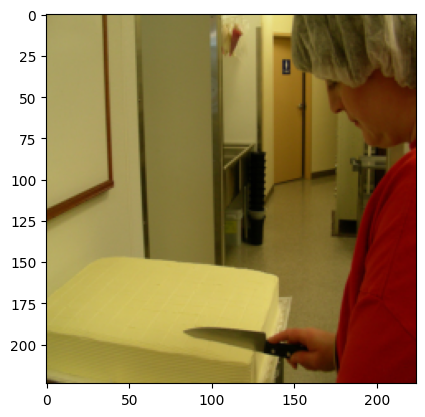

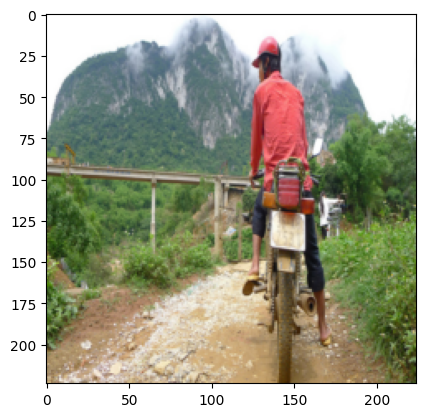

In [81]:
for caption in reconstructed_captions:
    print(dataset.dataset.tokenizer.decode(torch.argmax(caption, dim=-1)))
for image in images:
    plt.imshow(image.permute(1, 2, 0).detach().cpu().numpy())
    plt.show()    